In [1]:
#SQLite database file (sales_data.db)

import sqlite3

# Connect to the database (or create it if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        sale_id INTEGER PRIMARY KEY,
        product_name TEXT,
        quantity INTEGER,
        price REAL,
        sale_date DATE
    )
''')

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Database 'sales_data.db' with 'sales' table created successfully.")

Database 'sales_data.db' with 'sales' table created successfully.


In [3]:
#database values 

import sqlite3
from datetime import date

# Connect to the database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Sample sales data
sales_entries = [
    ("Laptop", 2, 75000.0, date(2025, 6, 1)),
    ("Smartphone", 5, 25000.0, date(2025, 6, 2)),
    ("Headphones", 10, 1500.0, date(2025, 6, 3)),
    ("Laptop", 1, 76000.0, date(2025, 6, 4)),
    ("Smartphone", 3, 25500.0, date(2025, 6, 5)),
]

# Insert the data
cursor.executemany('''
    INSERT INTO sales (product_name, quantity, price, sale_date)
    VALUES (?, ?, ?, ?)
''', sales_entries)

conn.commit()
conn.close()

print("Sample sales data inserted successfully.")

Sample sales data inserted successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_27880\1040706343.py:18: DeprecationWarning: The default date adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  cursor.executemany('''


Sales Summary:
      product  total_qty   revenue
0  Headphones         10   15000.0
1      Laptop          3  226000.0
2  Smartphone          8  201500.0


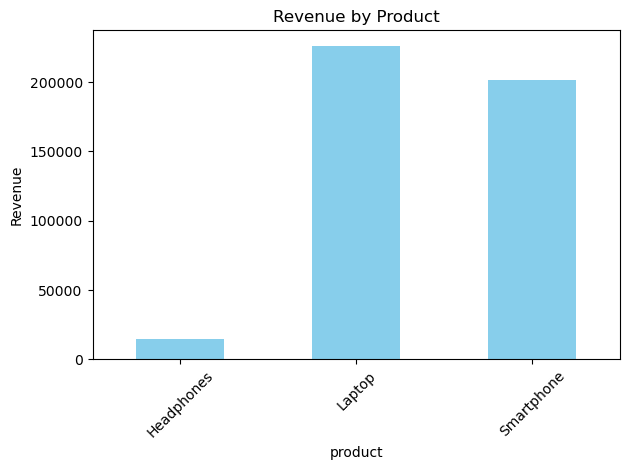

In [5]:
#use query and get graph plot

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# Run the SQL query
query = """
SELECT 
    product_name AS product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product_name
"""
df = pd.read_sql_query(query, conn)

# Print results
print("Sales Summary:")
print(df)

# Plot simple bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart if needed
plt.show()

# Close the database connection
conn.close()